# Introduction

Hinge loss originated as part of the SVM (Support Vector Machine) optimization framework, which seeks to maximize the margin between two classes of data points. The primary objective in SVMs is to create a decision boundary (hyperplane) that separates two classes while keeping the margin as wide as possible.

For SVMs, the hinge loss function was introduced to penalize points that are either misclassified or too close to the decision boundary (i.e., the margin). It is particularly suited for large-margin classifiers like SVMs.

# Loss Analysis

Hinge loss is used for training binary classifiers. It penalizes incorrect predictions and points that lie within the margin of the classifier, but not the ones that are confidently classified on the correct side of the margin.

**Mathematically**, the hinge loss function for a single data point $(x_i,y_i)$ is defined as:

$$\mathcal{L}(y_i, f(x)) = \max(0, 1 - y_i \cdot f(x_i))$$

where:
- $y_i$ is the true label of the data point $x_i$, taking values from $\{-1, 1\}$ (for binary classification).
- $f(x_i)$ is the predicted score for sample $x_i$ from the classifier.

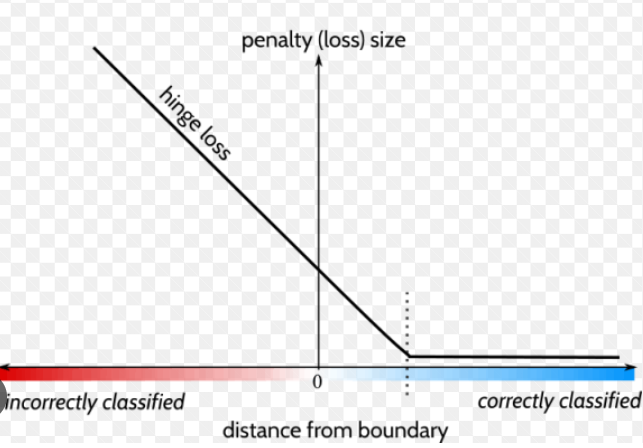

**How it works**:
- If the sample is correctly classified and lies far enough from the decision boundary, i.e., $y_i \cdot f(x_i) > 1$, then the loss is $0$. This means no penalty is imposed.
- If the sample is correctly classified but lies within the margin, i.e., $0 < y_i \cdot f(x_i) < 1$, the loss is proportional to the distance from the margin boundary. This penalizes points that are too close to the decision boundary.
- If the sample is misclassified, i.e., $y_i \cdot f(x_i) < 0$, then the loss grows linearly as the classification becomes worse. This imposes a significant penalty on misclassified points.

**Example**:

Suppose we have a true label $y_i = 1$ and the predicted score $f(x_i) = 0.5$:

$$\mathcal{L}(1, 0.5) = \max(0, 1 - 1 \times 0.5) = \max(0, 0.5) = 0.5$$

In this case, the point is correctly classified but is within the margin, so a small penalty is applied.

Now, suppose the model predicts $f(x_i) = -0.5$ with the same true label:

$$\mathcal{L}(1, -0.5) = \max(0, 1 - 1 \times -0.5) = \max(0, 1.5) = 1.5$$

Here, the point is misclassified, and a larger penalty is imposed.

# Pros and Cons

Pros:
- **Margin Maximization**: Hinge loss encourages models like SVMs to create a decision boundary that maximizes the margin, which often results in better generalization to unseen data.
- **Sparse Updates**: In optimization, only points close to or within the margin contribute to the gradient. This sparsity can lead to more efficient training in some cases.
- **Robustness to Outliers**: Since hinge loss does not grow quadratically (like MSE), it is less sensitive to outliers, especially compared to loss functions that penalize all misclassifications heavily.
- **Support for Large-Margin Classifiers**: Hinge loss directly supports SVMs, a well-established technique for classification tasks, particularly for high-dimensional data like text classification.

Cons:
- **Not Differentiable Everywhere**: Hinge loss is not differentiable at $y_i \cdot f(x_i) = 1$, which can complicate optimization in some gradient-based algorithms. However, sub-gradient methods can handle this.
- **Limited to Binary Classification**: Hinge loss is primarily designed for binary classification problems. Extending it to multi-class classification is more complex (e.g., via methods like multi-class SVMs or one-vs-all strategies).
- **Zero Gradients for Correctly Classified Points**: When points are correctly classified and lie far from the margin, hinge loss gives zero gradients. This means that further improvements on confidently classified points are not captured.

# Use Cases

Hinge loss is commonly used when:
- Binary classification tasks are involved.
- Large-margin classifiers are being trained (such as SVMs).
- The data is linearly separable or close to separable, but a decision boundary with a large margin is desired.

It is particularly effective when dealing with high-dimensional data, such as text classification using bag-of-words models or other sparse representations.

# Useful insights

- **Connection to SVMs**: Hinge loss is inherently linked to the objective of SVMs. When used with SVM, it works in conjunction with a regularization term to form the complete loss function:

$$\mathcal{L}_{\text{SVM}} = \frac{1}{2} \lVert w \rVert^2 + C \sum_{i=1}^{n} \max(0, 1 - y_i \cdot f(x_i))$$
- **Hinge Loss vs. Logistic Loss**: Hinge loss is closely related to logistic loss, another commonly used loss function for binary classification, particularly in logistic regression. The difference is that hinge loss focuses on margin maximization, whereas logistic loss focuses on probability calibration.